In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import plotly.offline as offline
import plotly.graph_objs as go

offline.init_notebook_mode()

%matplotlib inline

ImportError: No module named 'plotly'

### Global Variables

In [148]:
TEST_SIZE = 200  #10000
TRAIN_SIZE = 300 #55000

### Load the digits dataset

In [111]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [112]:
print('Size of test set: ', len(mnist.test.images))

Size of test set:  10000


In [113]:
print('Size of training set: ', len(mnist.train.images))

Size of training set:  55000


In [114]:
print('Size of validation set: ', len(mnist.validation.images))

Size of validation set:  5000


### Slicing the data set to get smaller samples

In [149]:
train_index = np.random.choice([i for i in range(len(mnist.train.images))], TRAIN_SIZE)
train = mnist.train.images[train_index]
train_label = mnist.train.labels[train_index]

In [150]:
test_index = np.random.choice([i for i in range(len(mnist.test.images))], TEST_SIZE)
test = mnist.test.images[test_index]
test_label = mnist.test.labels[test_index]

In [151]:
# Labels to numbers
label_to_number = lambda x: np.where(x==1)[0][0]
test_label = np.apply_along_axis(label_to_number, 1, test_label)
train_label = np.apply_along_axis(label_to_number, 1, train_label)

### SYMMETRY FEATURE

The symmetry feature is calculated by subtracting the flipped matrix with the original.

In [207]:
def symmetry(A):
    matrix = np.reshape(A, (28,28))
    flipped = np.flip(matrix, 1)
    sym = np.subtract(matrix, flipped)
    
    return np.linalg.norm(sym)

In [208]:
test_sym = np.apply_along_axis(symmetry, 1, test)
train_sym = np.apply_along_axis(symmetry, 1,train)

In [209]:
np.shape(test_sym), np.shape(train_sym)

((200,), (300,))

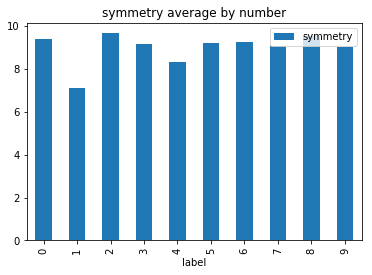

In [210]:
sym_plot = {'symmetry': test_sym, 'label': test_label}
pd.DataFrame.from_dict(sym_plot).groupby('label').mean().plot(kind='bar', title='symmetry average by number')

### AVERAGE INTENSITY FEATURE

The average feature is calculated for each pixel.

In [224]:
test_inten = np.mean(test,1)
train_inten = np.mean(train,1)

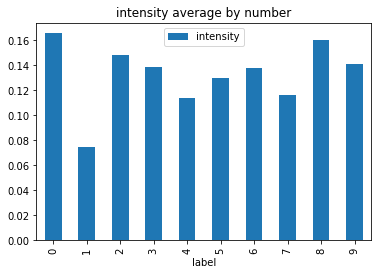

In [226]:
inten_plot = {'intensity': test_inten, 'label': test_label}
pd.DataFrame.from_dict(inten_plot).groupby('label').mean().plot(kind='bar', title='intensity average by number')

### Both features plot

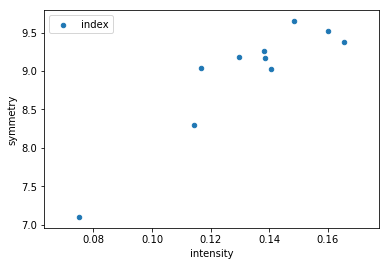

In [242]:
both_plot = {'symmetry': test_sym, 'intensity': test_inten, 'label': test_label}
pd.DataFrame.from_dict(both_plot).groupby('label').mean().reset_index().plot(kind='scatter',x='intensity', y='symmetry', marker='o')

In [ ]:
class Neural:
    
    def __init__(self, )